In [37]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)
pima

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [38]:
pima = pima.drop(pima.index[0])
print(pima)

    pregnant glucose  bp skin insulin   bmi pedigree age label
1          6     148  72   35       0  33.6    0.627  50     1
2          1      85  66   29       0  26.6    0.351  31     0
3          8     183  64    0       0  23.3    0.672  32     1
4          1      89  66   23      94  28.1    0.167  21     0
5          0     137  40   35     168  43.1    2.288  33     1
..       ...     ...  ..  ...     ...   ...      ...  ..   ...
764       10     101  76   48     180  32.9    0.171  63     0
765        2     122  70   27       0  36.8     0.34  27     0
766        5     121  72   23     112  26.2    0.245  30     0
767        1     126  60    0       0  30.1    0.349  47     1
768        1      93  70   31       0  30.4    0.315  23     0

[768 rows x 9 columns]


In [39]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [40]:
# Selecting Feature
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

## Splitting Data

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using the function train_test_split(). You need to pass 3 parameters: features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [41]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

## Model Development and Prediction
First, import the Logistic Regression module and create a Logistic Regression classifier object using the LogisticRegression() function with random_state for reproducibility.

Then, fit your model on the train set using fit() and perform prediction on the test set using predict(). 

In [42]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

C:\Users\shefali sharma\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Model Evaluation using Confusion Matrix
A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions summed up class-wise.

In [43]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[116,   9],
       [ 26,  41]], dtype=int64)

Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 116 and 41 are actual predictions, and 26 and 9 are incorrect predictions.

## Visualizing Confusion Matrix using Heatmap

Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.

Here, you will visualize the confusion matrix using Heatmap.

Text(0.5, 427.9555555555555, 'Predicted label')

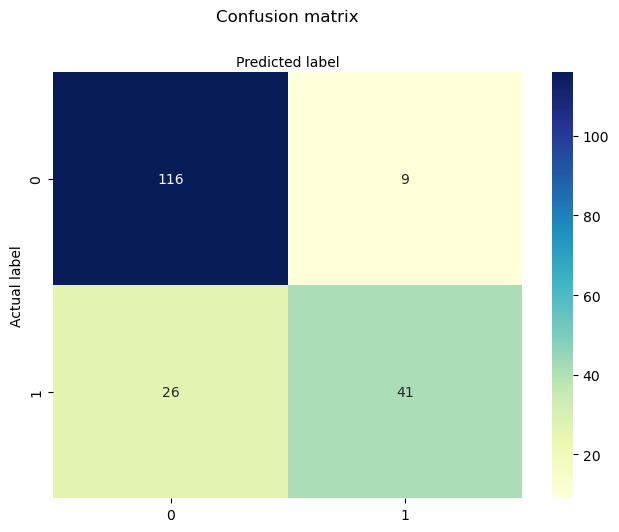

In [44]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Text(0.5,257.44,'Predicted label');

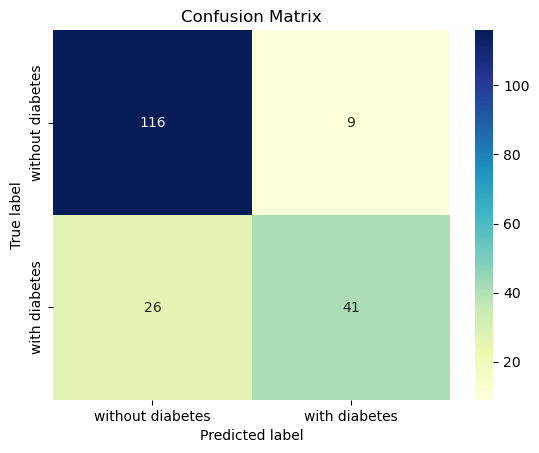

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample confusion matrix
conf_matrix = np.array([[100, 10], [5, 50]])

# Custom class names
class_names = ["without diabetes", "with diabetes"]

# Create heatmap
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt='g')

# Set custom tick labels for x and y axes
plt.xticks(np.arange(len(class_names)) + 0.5, class_names)
plt.yticks(np.arange(len(class_names)) + 0.5, class_names)

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")

plt.show()


## Confusion Matrix Evaluation Metrics
Let's evaluate the model using classification_report for accuracy, precision, and recall.

In [46]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.93      0.87       125
   with diabetes       0.82      0.61      0.70        67

        accuracy                           0.82       192
       macro avg       0.82      0.77      0.78       192
    weighted avg       0.82      0.82      0.81       192



- The precision, recall, and f1-score are three commonly used metrics to evaluate the performance of a binary classification model.

- Precision measures the proportion of true positives among all the positive predictions, while recall measures the proportion of true positives among all the actual positives.

- F1-score is the harmonic mean of precision and recall.

- The support column shows the number of samples in each class.

- In this case, there are 125 samples without diabetes and 67 samples with diabetes.

- The accuracy is the proportion of correct predictions among all the predictions.

- The macro avg and weighted avg are the average metrics across all the classes, with the former giving equal weight to each class and the latter giving more weight to the class with more samples.

- Overall, this code snippet provides a summary of the performance of a binary classification model, which can be used to evaluate and compare different models.


Well, you got a classification rate of 82%, considered as good accuracy.

Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Logistic Regression model predicted patients are going to suffer from diabetes, that patients have 82% of the time.

Recall: If there are patients who have diabetes in the test set and your Logistic Regression model can identify it 61% of the time.

## ROC Curve
Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

In [47]:
y_test.dtype

dtype('O')

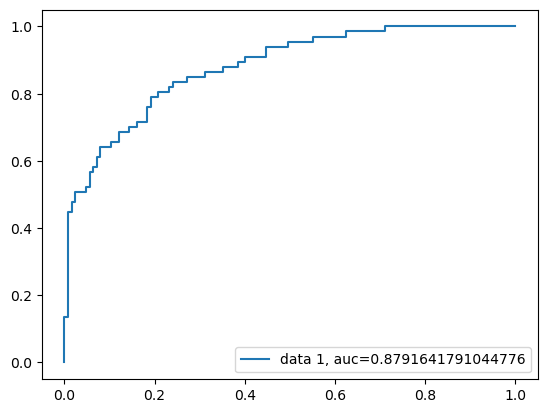

In [48]:
# Assuming y_test contains string labels '0' and '1'
# Convert them to integers
y_test = y_test.astype(int)

y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.88. AUC score 1 represents a perfect classifier, and 0.5 represents a worthless classifier.